In [3]:
try:
    import cv2
    import numpy as np
    import matplotlib.pyplot as plt
    print("Imported")
except Exception as e:
    print(f"Importing Error: {e}")

Imported


### Gaussian Pyramid

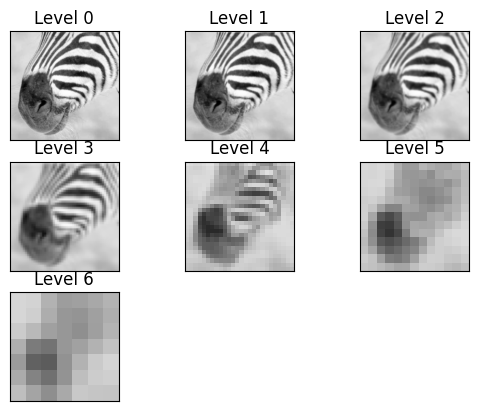

In [11]:
zebra_img = cv2.imread("../images/zebra.jfif")

pyramid_images = [zebra_img] 

for i in range(6):
    zebra_img = cv2.pyrDown(zebra_img)
    pyramid_images.append(zebra_img)

num_rows = 3
num_cols = 3

for i, pyramid_image in enumerate(pyramid_images):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(cv2.cvtColor(pyramid_image, cv2.COLOR_BGR2RGB))
    plt.title(f'Level {i}')
    plt.xticks([])
    plt.yticks([])

plt.show()

### Frequencies at Hybrid Images

* If viewing a hybrid image from distance, low-frequency image dominate
* If viewing a hybrid image closer, high-frequenct image dominate

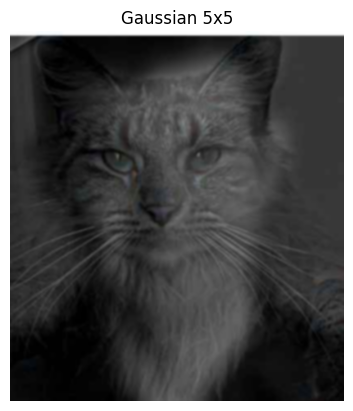

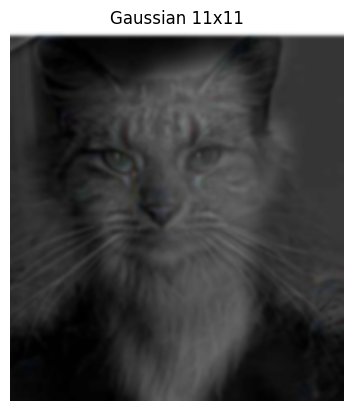

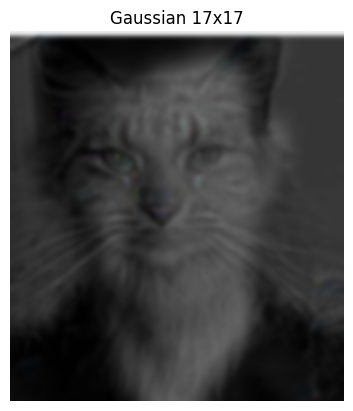

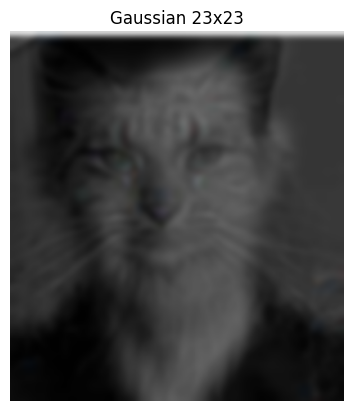

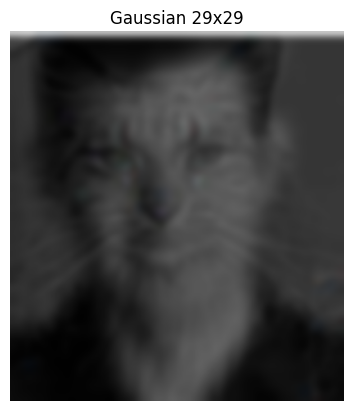

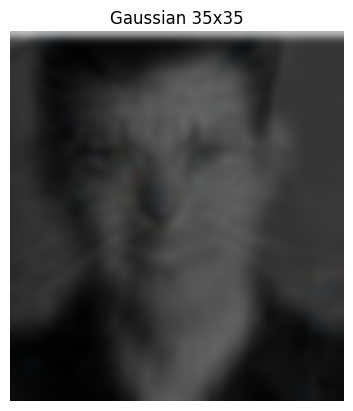

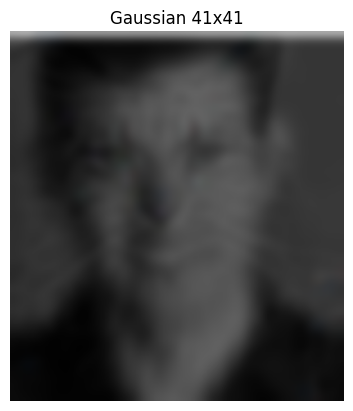

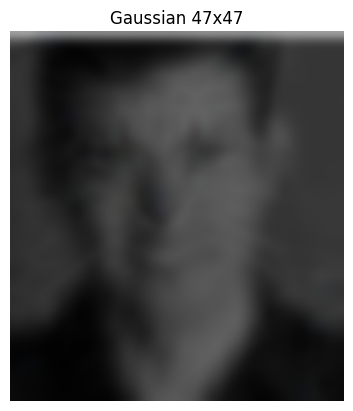

In [47]:
img = cv2.imread("../images/hybrid_image.jfif")

for i in range(5, 50, 6):
    ksize = (i, i)  # not-even dimension
    filtered_img = cv2.GaussianBlur(src=img, ksize=ksize, sigmaX=0)

    plt.imshow(filtered_img, cmap="gray")
    plt.axis("off")
    plt.title(f"Gaussian {i}x{i}")
    plt.show()

### Filter Banks

* Process image with eah filter and keep responses (or squared/abs responses)

Filter banks are a commonly used concept in the fields of signal processing and image processing. Essentially, a filter bank represents a collection of filters with different frequencies, orientations, scales, or other features applied to a signal or image. These filters are used for various applications such as feature extraction, pattern recognition, feature vector generation, and signal/image analysis.

Filter banks are used to extract specific features from signals or images. In particular, in image processing applications, filter banks may include:
1. Gabor Filters
2. Sobel Filters
3. Laplacian Filter
4. Haar Wavelet Filter
5. Canny Filter

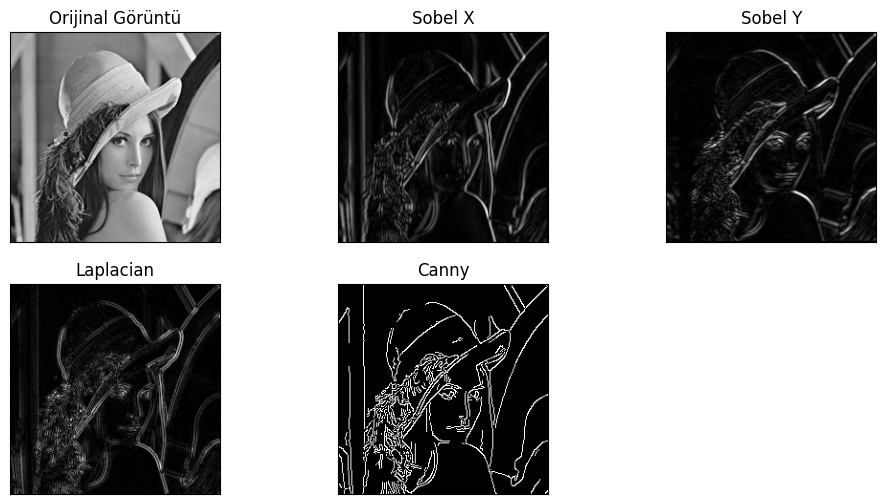

In [50]:
image = cv2.imread("../images/lenna.png", cv2.IMREAD_GRAYSCALE)

# Create Filter Banks
filters = []
filters.append(cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5))  # Edge detection for X direction
filters.append(cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5))  # Edge detection for Y direction
filters.append(cv2.Laplacian(image, cv2.CV_64F, ksize=5))  # Laplacian Filter
filters.append(cv2.Canny(image, 100, 200))  # Canny Edge Detection

# Plots
plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1), plt.imshow(image, cmap='gray')
plt.title('Orijinal Görüntü'), plt.xticks([]), plt.yticks([])

filter_names = ['Sobel X', 'Sobel Y', 'Laplacian', 'Canny']
for i in range(4):
    plt.subplot(2, 3, i + 2), plt.imshow(np.abs(filters[i]), cmap='gray')
    plt.title(filter_names[i]), plt.xticks([]), plt.yticks([])

plt.show()